<a href="https://colab.research.google.com/github/THEWACHER1103/Super_store/blob/main/Super_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**importacion de librerias**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline



Cargar y crea variable del **DataFrame**

In [ ]:
store_df = pd.read_csv('Super_store.csv', encoding='latin1', index_col='Row ID')


In [ ]:
pd.set_option('display.max_columns', 50)


In [ ]:
store_df.sample(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
5114,CA-2016-147970,1/31/2016,2/2/2016,Second Class,AB-10150,Aimee Bixby,Consumer,United States,Dallas,Texas,75220,Central,OFF-PA-10003936,Office Supplies,Paper,Xerox 1994,15.552,3,0.2,5.4432
3317,CA-2017-161739,11/10/2017,11/15/2017,Second Class,EB-13750,Edward Becker,Corporate,United States,Round Rock,Texas,78664,Central,FUR-FU-10001468,Furniture,Furnishings,Tenex Antistatic Computer Chair Mats,341.960,5,0.6,-427.4500
7367,CA-2016-127243,11/28/2016,12/4/2016,Standard Class,DS-13180,David Smith,Corporate,United States,Philadelphia,Pennsylvania,19140,East,OFF-ST-10002301,Office Supplies,Storage,Tennsco Commercial Shelving,32.544,2,0.2,-7.7292
1040,CA-2017-121818,11/20/2017,11/21/2017,First Class,JH-15430,Jennifer Halladay,Consumer,United States,Burlington,North Carolina,27217,South,OFF-AR-10004790,Office Supplies,Art,Staples in misc. colors,28.728,3,0.2,1.7955
172,CA-2014-118962,8/5/2014,8/9/2014,Standard Class,CS-12130,Chad Sievert,Consumer,United States,Los Angeles,California,90004,West,OFF-PA-10000659,Office Supplies,Paper,"Adams Phone Message Book, Professional, 400 Me...",20.940,3,0.0,9.8418


In [ ]:
store_df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount     

In [ ]:
store_df.isna().sum()

,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0
State,0


## observaciones:

Sales

* el promedio de ventas por cliente es de US$ 229.80 y la STD es de 623.24, dejando un marjen de 393.44 dolares de movimiento en la STD.

* como vi con Eric F. la venta minima que se realizo por cliente en la tienda es de US$0.44 y la maxima es de US$ 22,6638.48, dejando una mediana de US$54.49, esto haria ilusion a que tiene varios segmentos de clientes *


Quantity

* el promedio de las cantidades vendidas por cliente es de 3.9 articulos por persona.

* no existe una disviacion estandar ampliamente considerable en esta categoria.

* cantidad minima de articulo comprado 1 cantidad maxima 14 articulos


Discount

* el promedio descontado es de 15% vs la std es de 20% indicando que el porcentaje descontado podria variar en ± 5% en diferencia al promedio.

* el minimo de descuento no tiene sentido validarlo porque es 0% pero el maximo descontado es de 80% algo que me resulta anormal a primera instancia.

* tomando la mediana como punto de partida el Q3 da 20% de descuento, dando un avg mas real de lo que esta sucediendo

* veo una pequeña anomalia en los descuentos de los primeros percentiles cuando hago referencia con la columna profit, aun sin dar descuentos la compañia tiene perdidas muy exageradas.

Profit

* el promedio deganancia por compra es de US$ 28.65 teniendo en cuenta que existen compras lo suficiente mente grandes que hacen que el profit tenga una desviacion estandar de 234.26, dejando 205.61 rango.

* con el profit confirmamos que se la empresa esta perdiendo dinero hasta el percetil 19, teniendo una perdida de hasta US$ 6,599.97, el maximo de ganancia de la empresa es de US$ 8399.97, esto indica que la empresa tiene grandes perdidas en ciertas categorias pero que tambien recibe grandes ganancias en otras.

In [ ]:
store_df.describe(percentiles=[0.01,.05,.10,.15,.19,.20,.25,.35,.5,.65,.75,.80,.85,.90,.95,.99])

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
1%,2149.000000,2.286000,1.000000,0.000000,-319.264953
5%,10009.000000,4.980000,1.000000,0.000000,-53.030920
10%,10024.000000,7.897200,2.000000,0.000000,-15.473460
15%,13021.000000,10.776000,2.000000,0.000000,-4.779360
19%,19140.000000,13.003350,2.000000,0.000000,0.000000
20%,19140.000000,13.776000,2.000000,0.000000,0.400320


In [ ]:
store_df.shape

(9994, 20)

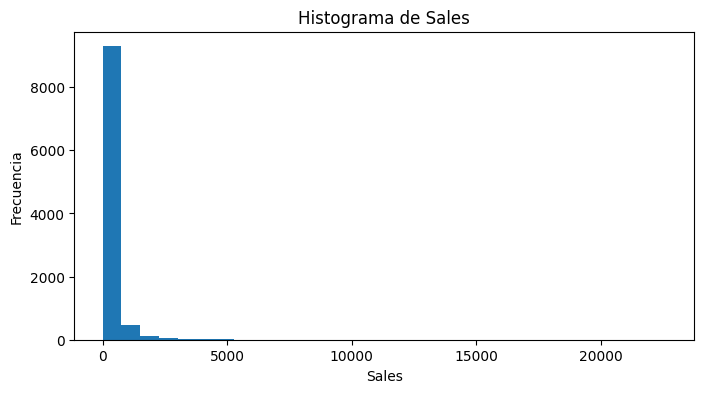

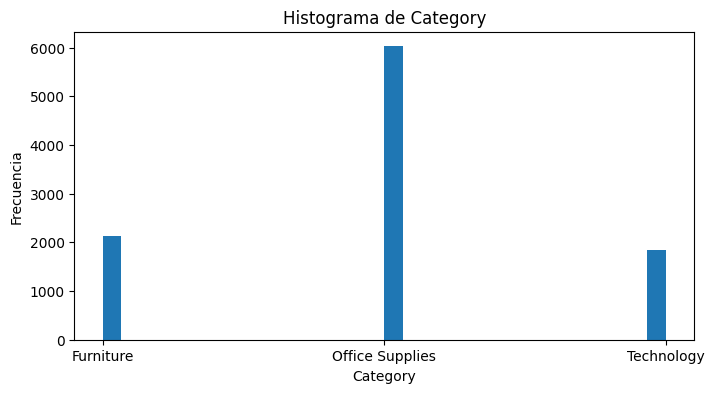

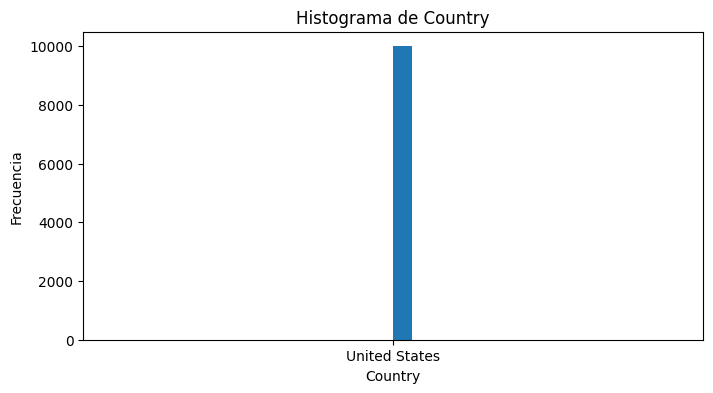

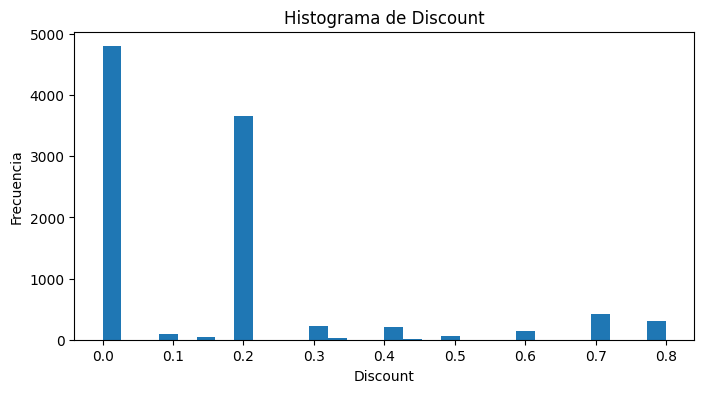

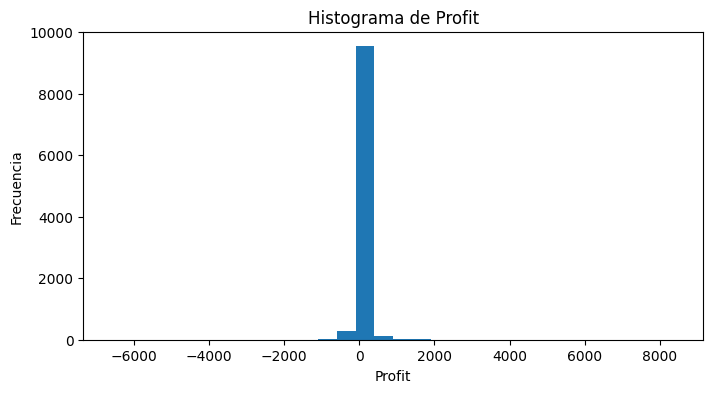

In [ ]:
import matplotlib.pyplot as plt

for col in ["Sales", 'Category', "Country", "Discount","Profit"]:
    plt.figure(figsize=(8,4))
    plt.hist(store_df[col], bins=30)
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()


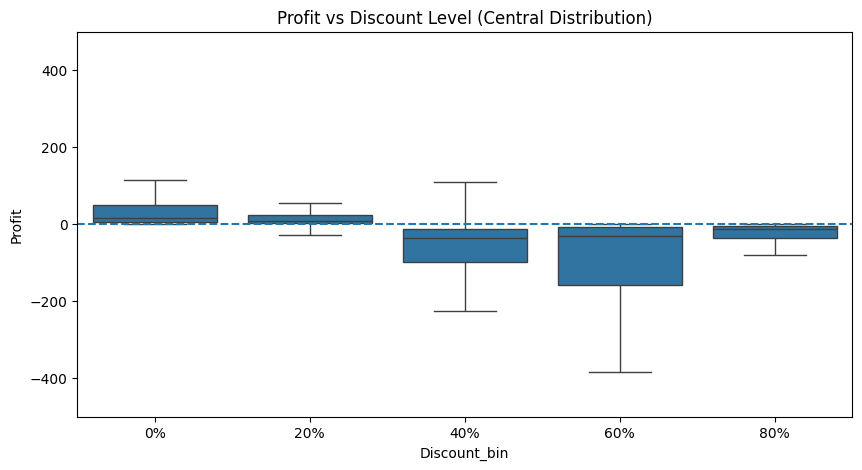

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(
    x='Discount_bin',
    y='Profit',
    data=store_df,
    showfliers=False
)

plt.ylim(-500, 500)
plt.axhline(0, linestyle='--')
plt.title('Profit vs Discount Level (Central Distribution)')
plt.show()


los descuentos del 60% solo crean perdidas muy significativas a la empresa
se puede ver como en los productos donde se realizan descuentos hasta el 20% existe ganancias y cuando pasan del 20% (descuentos descacbellados) existe una gran perdida que da indicios de mala inversion a nivel de inventario.

# **Analisis de Variables una contra otra**

# Profit X Category


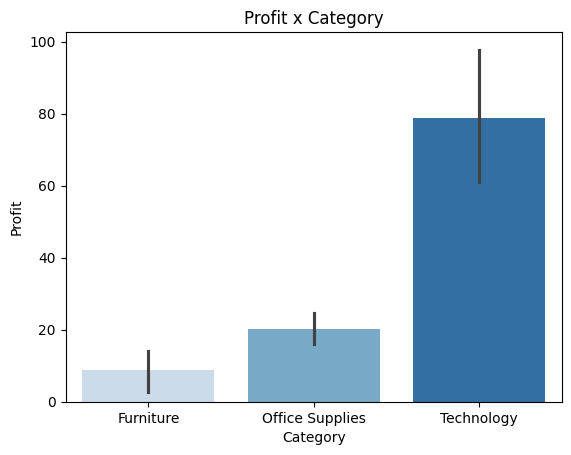

In [ ]:
sns.barplot(x='Category', y='Profit', data=store_df, palette='Blues')
plt.title('Profit x Category')
plt.show()

concluciones:
1. visualizo que la categoria que mas beneficios da a la empresa es es la insumos tecnologicos.

2. verificar oficce suplies porque puede tener un mejor rendimiento en el futuro.

#Sales X Region

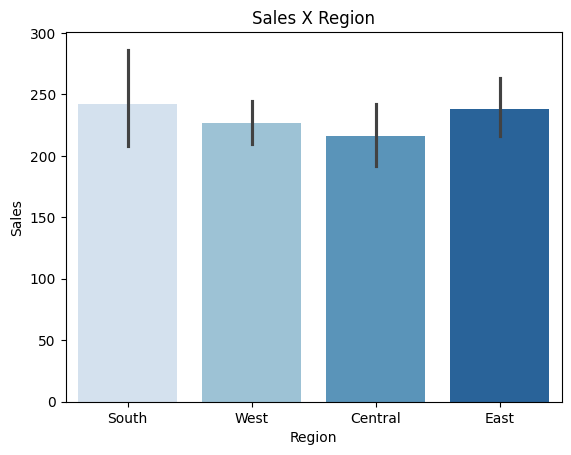

In [ ]:
sns.barplot(y='Sales', x='Region', data=store_df, palette='Blues')
plt.title('Sales X Region')
plt.show()

1. a simplevista las regiones tienen un rendimiento similar.


# **Sales X Sub-Category**

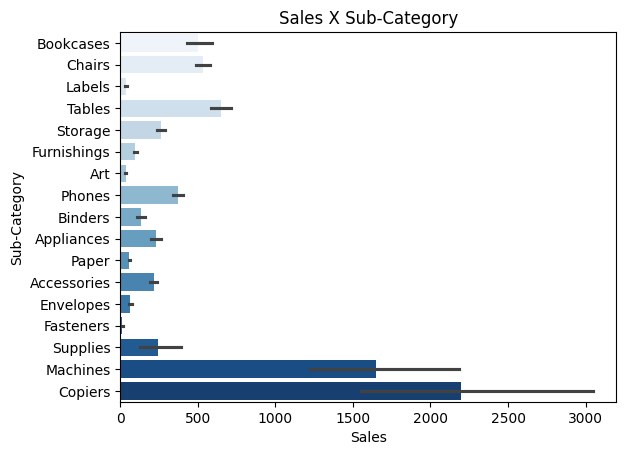

In [ ]:
#order = store_df.groupby("Sub-Category")["Sales"].sum().sort_values().index
sns.barplot(x='Sales', y='Sub-Category', data=store_df, palette='Blues' )

plt.title('Sales X Sub-Category')
plt.show()

1. confirmo que las ventas mas importantes de la empresa son en tecnologia pero para oficinas. (copiadoras, machinies, tables, sillas, book cases
pro )

# Profit X Sub-Category

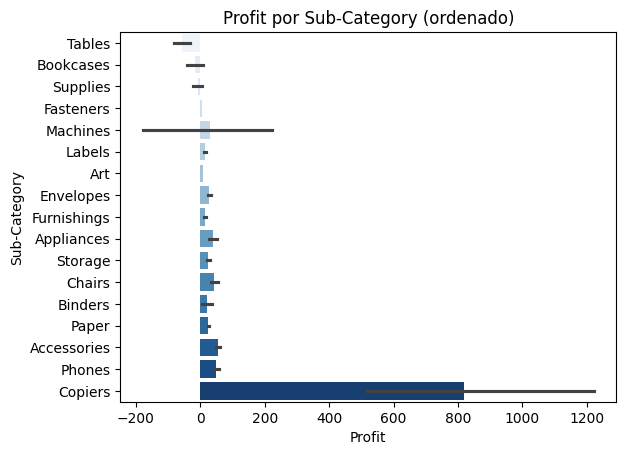

In [ ]:
order = store_df.groupby("Sub-Category")["Profit"].sum().sort_values(ascending=True).index

sns.barplot(x="Profit", y="Sub-Category", data=store_df, order=order, palette="Blues")

plt.title("Profit por Sub-Category (ordenado)")
plt.show()

1. existen productos que dejan perdidas a la empresa.
2. el proximo producto a incluir deberia ser los telefonos y accesorios.
3. aunque un producto se venda no significa que sea rentable, los margenes de perdida y ganancia en ciertos productos son muy evidentes.


# Profit X Segment

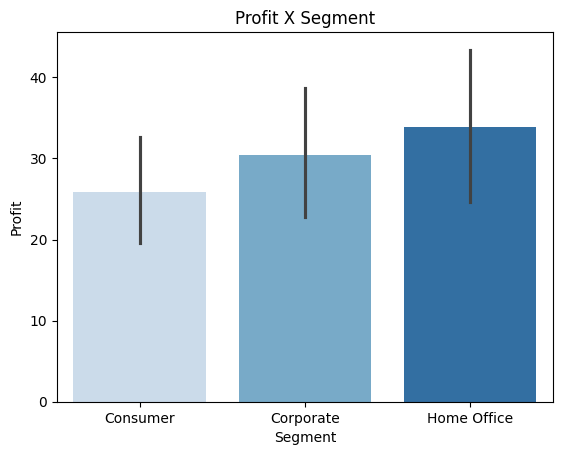

In [ ]:
sns.barplot(y='Profit', x='Segment', data=store_df, palette='Blues')
plt.title('Profit X Segment')
plt.show()

1. aqui ya entiendo porque la ventas disparadas en las foto copiadoras son tan evidentes, la tienda es preferida para adquirir productos para home oficce

# Profit X Region


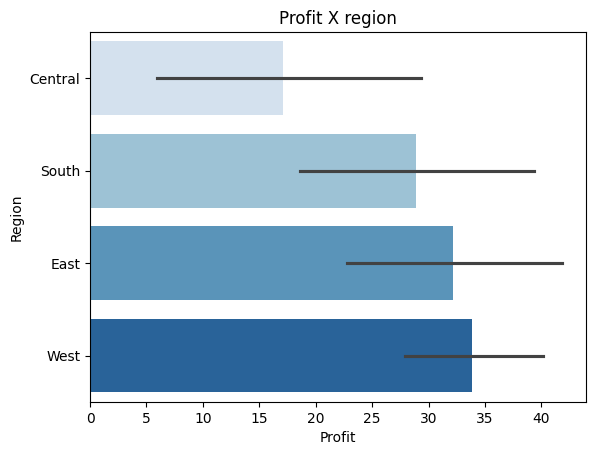

In [ ]:
order = store_df.groupby("Region")["Profit"].sum().sort_values(ascending=True).index

sns.barplot(x="Profit", y="Region", data=store_df, order=order, palette="Blues")

plt.title("Profit X region")
plt.show()

1. aunque se venda bien en todos las regiones unas estan teniendo un nivel mayor de ganancias que otras como es el caso de **"WEST VS CENTRAL"**.

2. la empresa esta teniendo pocas ganancias en los productos vendidos o se estan comprando mas de los productos que no dejan ganancia?

# QUE ES LO QUE SE ESTA VENDIENDO EN EL CENTRAL VS QUE SE ESTA VENDIENDO EN WEST

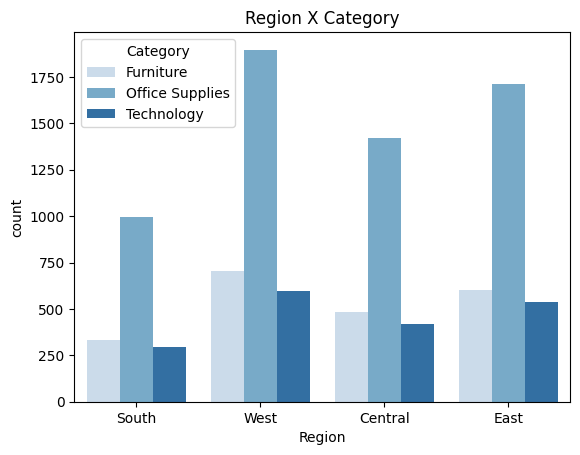

In [ ]:
sns.countplot(data=store_df, x="Region", hue="Category", palette="Blues")

plt.title("Region X Category")
plt.show()

1. La region **WEST** destaca por una creciente constante visible en los articulos de oficina.

2. Al parecer en **SOUTH** es una region donde **Super Store** no esta tan asentada y por ende no tiene ningun tipo de relevancia de cambio

#Analisis profundo de: Region X Sub-Category

In [ ]:
df_count = store_df.groupby(['Region', 'Sub-Category']).size().reset_index(name='Count')


fig = px.bar(df_count,x='Region',y='Count',color='Sub-Category',
    barmode='group',text='Count',title='Region X Sub-Category')

fig.update_layout(xaxis_title="Region",yaxis_title="Cantidad de Ventas",legend_title="Sub-Category")

fig.show()

#Analisis profundo de: Region X Category

In [ ]:
df_count = store_df.groupby(['Region', 'Category']).size().reset_index(name='Count')

fig = px.bar(df_count,x='Region', y='Count', color='Category', barmode='group',text='Count',title='Region X Segment')

fig.update_layout(xaxis_title="Region",yaxis_title="Cantidad de Ventas",legend_title="Sub-Category")
fig.show()

1. la empresa debe alejarse del segmento de forniture, puesto que este no tiene un resultado ideal entre la comunidad de clientes, incluso generea ventas pero las mismas no tienen margen de ganancias positivos, en cambio generan un porcentaje de perdidas a lo largo del tiempo.

2. tecnologia es una de las areas en la que la empresa es tiene un resultado mas optimo, esto es una contante positiva, puesto que los clientes prefieren nuestros productos de esa area, como copiadoras y de mas.

3. existe una creciente ola de compras para oficinas pero la misma esta muy definida con la creciente demanda de teletrabajo o home office.

#Modelo Predictivo de Segments X Sales



#Entrenando el modelo para ver cual es mas adecuado para los datos.
con ayuda de GPT

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer

In [ ]:


# defini las variables utilizando a SALES como la variable que quiero predecir.
Y = store_df['Profit']
X = store_df.drop(columns=['State','Ship Date','Order Date','Order ID','Customer ID',
                           'Customer Name','Country', 'City','Product ID','Postal Code'], errors="ignore")

In [ ]:
# identifique los tipos de variables
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Creamos el procesador
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

In [ ]:
#creamos el pipeline con RandomForest

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

#Separar datos en entrenamiento y prueba

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

#Buscando mejores hiperparametros(GridSearch)

param_grid = {
    'model__n_estimators':[50,100,200],
    'model__max_depth':[None,10,20,30],
    'model__min_samples_split':[2,5,10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train,Y_train)

In [ ]:
#Evaluaion del modelo

best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

mse =mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test,Y_pred)

print("Mejores parámetros:", grid_search.best_params_)
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

In [ ]:
# validando Sobre ajuste
y_train_pred = best_model.predict(X_train)
print("R² Entrenamiento:", r2_score(Y_train, y_train_pred))
print("R² Prueba:", r2_score(Y_test, Y_pred))

In [ ]:
import joblib
joblib.dump(best_model, 'modelo_profit_rf.pkl')


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(Y_test, Y_pred, alpha=0.5, color='steelblue', edgecolor='k')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Profit Real')
plt.ylabel('Profit Predicho')
plt.title('Random Forest - Profit Real vs Profit Predicho')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
import seaborn as sns
import numpy as np

errores = Y_test - Y_pred

plt.figure(figsize=(8,5))
sns.histplot(errores, bins=30, kde=True, color='steelblue')
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribución de Errores del Modelo')
plt.xlabel('Error (Profit Real - Profit Predicho)')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Recomendaciones Estratégicas
- Prohibir descuentos > 30% en región Central
- Bonificar vendedores que vendan Copiers (+300% profit vs promedio)
- Eliminar Tables y Bookcases del catálogo
- Enfocar marketing en Home Office + Technology